#데이터셋

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import sys
import os

# 1. '밑시딥' 폴더 자체를 파이썬 경로에 추가
# 그래야 그 안에 있는 'dataset' 폴더를 모듈로 인식합니다.
path = '/content/drive/MyDrive/밑시딥'

if path not in sys.path:
    sys.path.append(path)

In [27]:
import sys,os
sys.path.append('/content/drive/MyDrive/밑시딥')
from dataset.mnist import load_mnist


In [28]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

In [29]:

x = np.array([-1.0,1.0,2.0])
y = x > 0
print(y)
y = y.astype(int)
print(y)


[False  True  True]
[0 1 1]


계단함수

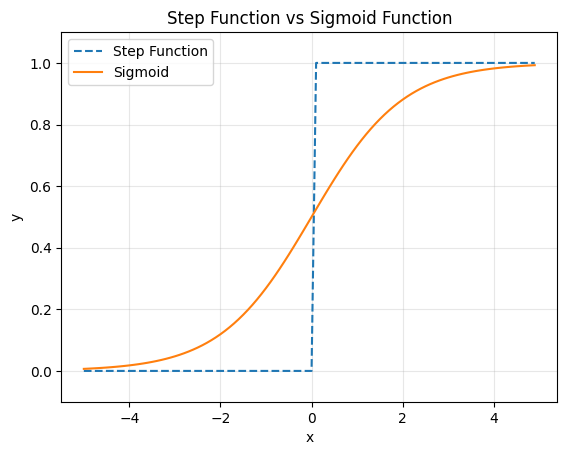

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 함수 정의
def step_function(x):
    return np.array(x > 0, dtype=int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 2. 데이터 준비
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

# 3. 그래프 그리기
plt.plot(x, y1, label='Step Function', linestyle='--')
plt.plot(x, y2, label='Sigmoid')
# 4. 그래프 설정
plt.ylim(-0.1, 1.1)     # y축 범위 설정
plt.title('Step Function vs Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()            # 범례 표시
plt.grid(True, alpha=0.3) # 그리드 추가 (선택사항)

plt.show()

In [31]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [32]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
print("[X_shape:",X.shape,"] [W_shape:",W.shape,"]")
Y = np.dot(X,W)
print(Y)

[X_shape: (2,) ] [W_shape: (2, 3) ]
[ 5 11 17]


### 3층 신경망

In [33]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print("===shape===")
print(X.shape)
print(W1.shape)
print(B1.shape)

print("===dot&sigmoid===")
A1 = np.dot(X,W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)

print("===[floor 2]===")
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
print("===shape===")
print(Z1.shape)
print(W2.shape)
print(B2.shape)

print("===dot&sigmoid===")
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)


print("===[floor 3]===")

def identity_function(x):
  return X
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print("result:",Y)

===shape===
(2,)
(2, 3)
(3,)
===dot&sigmoid===
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
===[floor 2]===
===shape===
(3,)
(3, 2)
(2,)
===dot&sigmoid===
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
===[floor 3]===
result: [1.  0.5]


### 출력층 설계

#### softmax
e / sum(e)

In [34]:
arr = np.array([0.3,2.9,4.0])
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y
print(softmax(arr))

[0.01821127 0.24519181 0.73659691]


e의 지수값은 기하급수적으로 커지므로 오버플로우 발생

In [35]:
arr = np.array([1010,1000,990])
print(softmax(arr))


[nan nan nan]


/tmp/ipython-input-1151112933.py:3: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/tmp/ipython-input-1151112933.py:5: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


In [36]:
arr = np.array([1010,1000,990])
def softmax(a):
  c = np.max(a) #해결책 = 최댓값을 빼줘서 값을 작게 만든다.
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y
print(softmax(arr))
print("sum:",np.sum(softmax(arr)))


[9.99954600e-01 4.53978686e-05 2.06106005e-09]
sum: 1.0


In [37]:
(x_train,t_train),(x_test,t_test) = load_mnist(flatten = True,normalize = False)
print(x_train.shape) #훈련 이미지
print(t_train.shape) #훈련 레이블
print(x_test.shape) #시험 이미지
print(t_test.shape) #시험 레이블

(60000, 784)
(60000,)
(10000, 784)
(10000,)


이미지 출력해보기

Label: 5
Original shape: (784,)


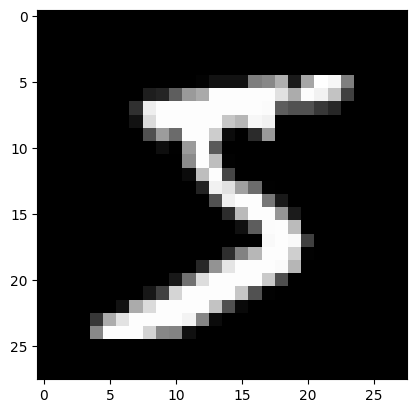

In [38]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))

    plt.imshow(np.array(pil_img), cmap='gray')
    plt.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(f"Label: {label}")

print(f"Original shape: {img.shape}") # 현재 1차원 배열로 디어 있음
img = img.reshape(28, 28) #다시 2차원으로 바꿈
img_show(img)

In [39]:
import pickle
def get_data():
  (x_tain, t_train), (x_test,t_test) = load_mnist(normalize = True, flatten=True, one_hot_label = False)
  return x_test,t_test

def init_network():
  target_file = "/content/drive/MyDrive/밑시딥/sample_weight.pkl"

  with open(target_file,"rb") as f:
    network = pickle.load(f) #파이썬 객체 불러오기 피클 = 파이썬 객체 저장 라이브러리
  return network

def predict(network,x):
  W1,W2,W3 = network["W1"],network["W2"],network["W3"]
  b1,b2,b3 = network["b1"],network["b2"],network["b3"]

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3
  y = softmax(a3) #출력층 활성화함수

  return y

In [40]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network,x[i]) #각 레이블의 확률
  p = np.argmax(y) #확률이 가장 높은 인덱스를 얻어옴
  if p == t[i]:
    accuracy_cnt += 1
print("Accuacy:" + str(float(accuracy_cnt) / len(x)))

Accuacy:0.9352


In [41]:
x, _ = get_data()
network = init_network()
W1,W2,W3 = network['W1'],network['W2'],network['W3']
print(x.shape)

(10000, 784)


### 배치 처리

In [42]:
x, t = get_data()
network = init_network()
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuray:", str(float(accuracy_cnt) / len(x)))

Accuray: 0.9352


## 손실 함수

### 오차제곱합

In [43]:
y = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
t = np.array([0,0,1,0,0,0,0,0,0,0]) # 정답 = 2

def sum_squares_error(y,t):
  return 0.5 * np.sum((y-t)**2)

print(sum_squares_error(y,t))

0.09750000000000003


### 교차 엔트로피 오차

In [44]:
def cross_entropy_error(y,t):
  delta = 1e-7 # log0이되면 무한이 되므로 방지하기 위해
  return -np.sum(t*np.log(y+delta))

print(cross_entropy_error(y,t))

0.510825457099338


### 미니배치

기본 값

In [45]:
(x_train,t_train), (x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape) #손실함수 값도 6만개

(60000, 784)
(60000, 10)


미니 배치 (무작위 10개 추출)

In [46]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size) #6만 미만 수 중 랜덤 10개
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


[ 4382 37091  3991 12196 20370 53010 10680 29691 21496 45368]


원 핫 인코딩 아닐떄

In [97]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.trshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size #팬시 인덱싱 ( 정답 값 예:2,7의 출력값만 빼서 더함)

원 핫 인코딩

In [99]:
def cross_entropy_error(y,t):
  if y.ndim == 1: #1차원 배열이라면 2차원 배열로 바꿔줌 ex) (784,) -> (1,784)
    t = t.reshape(1,t.size)
    y = y.trshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size


## 수치미분

In [49]:
def numerical_diff(f,x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h) # 중심차분

### 편미분

In [50]:
#x0^2 + x1^2
def function_2(x):
  return x[0]**2 + x[1]**2

In [51]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    #f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x-h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return  grad


In [52]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [109]:
import sys
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)

    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)

    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1,W2 = self.params['W1'],self.params['W2']
    b1,b2 = self.params['b1'],self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    a2=np.dot(z1,W2)+b2
    y=softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y,t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x,t)

    grads = {}

    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads


In [110]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)



(784, 100)
(100,)
(100, 10)
(10,)


In [112]:
x = np.random.rand(100,784)
t - np.random.rand(100,10)

grads = net.numerical_gradient(x,t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (100,) (10,) 